In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
stationary_data = pd.read_csv('stationary.csv')
dataframe1 = pd.DataFrame(stationary_data)
print(dataframe1.head())
print('-------------------------------------------------------------------------------------------')
print(dataframe1.describe())

   sequence        time   latitude   logitude  altitude   utm_easting  \
0        22  1644175348  42.339169 -71.084839       4.2  328254.96875   
1        23  1644175349  42.339169 -71.084839       4.2  328254.96875   
2        24  1644175350  42.339169 -71.084839       4.2  328255.12500   
3        25  1644175351  42.339169 -71.084839       4.2  328255.12500   
4        26  1644175352  42.339169 -71.084839       4.2  328255.12500   

   utm_northing  zone_num zone_letter  
0     4689539.5        19           T  
1     4689539.5        19           T  
2     4689539.5        19           T  
3     4689539.5        19           T  
4     4689539.5        19           T  
-------------------------------------------------------------------------------------------
         sequence          time    latitude    logitude    altitude  \
count  617.000000  6.170000e+02  617.000000  617.000000  617.000000   
mean   330.000000  1.644176e+09   42.339193  -71.084816   -3.486710   
std    178.25683

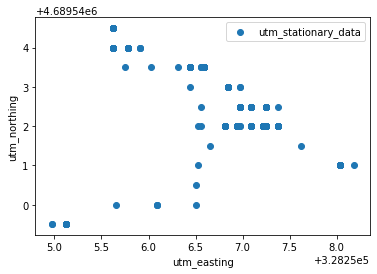

In [3]:
utm_east = dataframe1['utm_easting']
utm_north = dataframe1['utm_northing']
alt = dataframe1['altitude']
time = dataframe1['time']
plt.scatter(utm_east,utm_north, label='utm_stationary_data')
plt.xlabel('utm_easting')
plt.ylabel('utm_northing')
plt.legend()

In [4]:
utm_east_mean = np.mean(utm_east)
utm_north_mean = np.mean(utm_north)
alt_mean = np.mean(alt)

utm_east_dev = np.std(utm_east)
utm_north_dev = np.std(utm_north)
alt_dev = np.std(alt)

list_alt = np.ones((alt.shape[0],1))*alt_mean
list_alt_std1 = np.ones((alt.shape[0],1))*alt_dev+list_alt
list_alt_std2 = -np.ones((alt.shape[0],1))*alt_dev+list_alt




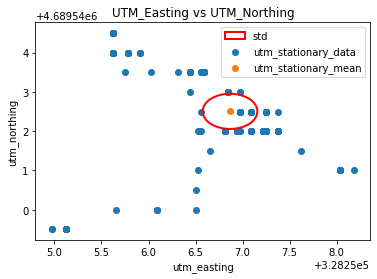

In [33]:
from matplotlib.patches import Ellipse
plt.scatter(utm_east,utm_north, label='utm_stationary_data')
plt.scatter(utm_east_mean,utm_north_mean, label='utm_stationary_mean')
ellipse = Ellipse(xy=(utm_east_mean,utm_north_mean), width=utm_east_dev, height=utm_north_dev, 
                        edgecolor='r', fc='None', lw=2, label='std')
plt.gca().add_patch(ellipse)
plt.xlabel('utm_easting')
plt.ylabel('utm_northing')
plt.title('UTM_Easting vs UTM_Northing')
plt.legend()

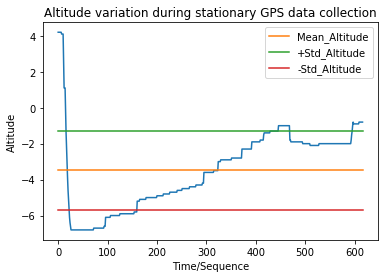

In [5]:
plt.plot(alt)
plt.plot(list_alt, label='Mean_Altitude')
plt.plot(list_alt_std1, label='+Std_Altitude')
plt.plot(list_alt_std2, label='-Std_Altitude')
plt.xlabel('Time/Sequence')
plt.ylabel('Altitude')
plt.title('Altitude variation during stationary GPS data collection')
plt.legend()

In [122]:
utm_east_mean = np.mean(utm_east)
utm_north_mean = np.mean(utm_north)
alt_mean = np.mean(alt)

utm_east_dev = np.std(utm_east)
utm_north_dev = np.std(utm_north)
alt_dev = np.std(alt)



In [8]:
utm_north_dev

0.8959117214018066

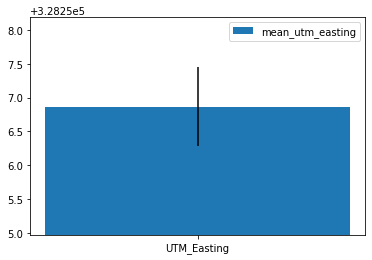

In [117]:
bars = utm_east_mean
bar_categories = 'UTM_Easting'
error_bars = utm_east_dev
low = min(utm_east)
high = max(utm_east)
plt.ylim(low,high)
plt.bar(bar_categories,utm_east_mean,yerr=error_bars, label='mean_utm_easting')
plt.legend()


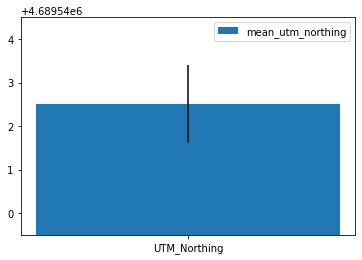

In [119]:
bars = utm_north_mean
bar_categories = 'UTM_Northing'
error_bars = utm_north_dev
low = min(utm_north)
high = max(utm_north)
plt.ylim(low,high)
plt.bar(bar_categories,utm_north_mean,yerr=error_bars, label='mean_utm_northing')
plt.legend()

Text(0, 0.5, 'meters')

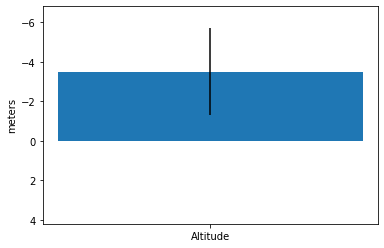

In [123]:
bars = alt_mean
bar_categories = 'Altitude'
error_bars = alt_dev
low = min(alt)
high = max(alt)
plt.ylim(high,low)
plt.bar(bar_categories,alt_mean,yerr=error_bars)
plt.ylabel('meters')

In [34]:
walking_data = pd.read_csv('football1.csv')
dataframe2 = pd.DataFrame(walking_data)
print(dataframe2.head())
print('-------------------------------------------------------------------------------------------')
print(dataframe2.describe())

   sequence        time   latitude   logitude  altitude   utm_easting  \
0       907  1644176234  42.338802 -71.084389       8.6  328291.34375   
1       908  1644176235  42.338802 -71.084389       8.8  328291.18750   
2       909  1644176236  42.338806 -71.084389       8.9  328290.93750   
3       910  1644176237  42.338806 -71.084396       8.9  328290.65625   
4       911  1644176238  42.338806 -71.084396       8.9  328290.65625   

   utm_northing  zone_num zone_letter  
0     4689498.5        19           T  
1     4689498.5        19           T  
2     4689499.0        19           T  
3     4689499.0        19           T  
4     4689499.0        19           T  
-------------------------------------------------------------------------------------------
          sequence          time    latitude    logitude    altitude  \
count   105.000000  1.050000e+02  105.000000  105.000000  105.000000   
mean    959.000000  1.644176e+09   42.339129  -71.084892    9.471429   
std      30.4

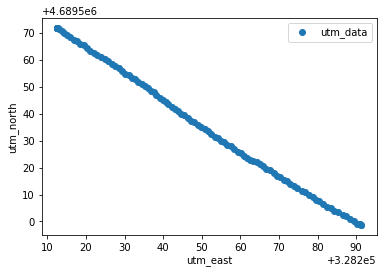

In [35]:
utm_east = np.array(dataframe2['utm_easting'])
utm_north = np.array(dataframe2['utm_northing'])
alt = dataframe2['altitude']
time = dataframe2['time']
plt.scatter(utm_east,utm_north, label='utm_data')
plt.xlabel('utm_east')
plt.ylabel('utm_north')
plt.legend()

In [36]:
X = np.reshape(utm_east,(utm_east.shape[0],1))
y = np.reshape(utm_north,(utm_north.shape[0],1))
reg = LinearRegression().fit(X, y)
m = reg.coef_
c = reg.intercept_
print(m[0],c)


[-0.94379861] [4999337.92677624]


Mean squared error: 0.62024
Coefficient of determination(r2_score): 0.99892


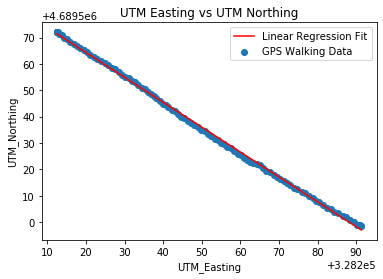

In [40]:
y_pred = m*X+c
plt.scatter(X,y, label='GPS Walking Data')
plt.plot(X,y_pred,color ='r', label='Linear Regression Fit')
print("Mean squared error: %.5f" % mean_squared_error(y,y_pred))
print("Coefficient of determination(r2_score): %.5f" % r2_score(y, y_pred))
plt.xlabel('UTM_Easting')
plt.ylabel('UTM_Northing')
plt.title('UTM Easting vs UTM Northing')
plt.legend()

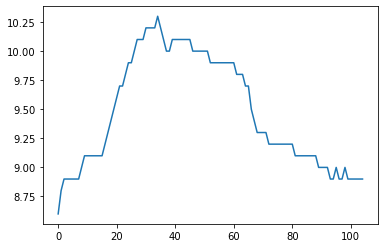

In [104]:
plt.plot(alt)

In [ ]:
alt_mean = np.mean(alt)

utm_east_dev = np.std(utm_east)
utm_north_dev = np.std(utm_north)
alt_dev = np.std(alt)

list_alt = np.ones((alt.shape[0],1))*alt_mean
list_alt_std1 = np.ones((alt.shape[0],1))*alt_dev+list_alt
list_alt_std2 = -np.ones((alt.shape[0],1))*alt_dev+list_alt

Text(0.5, 1.0, 'Altitude variation during straight line walking')

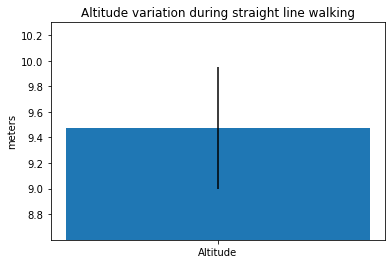

In [45]:
alt_mean = np.mean(alt)
alt_dev = np.std(alt)
bars = alt_mean
bar_categories = 'Altitude'
error_bars = alt_dev
low = min(alt)
high = max(alt)
plt.ylim(low,high)
plt.bar(bar_categories,alt_mean,yerr=error_bars)
plt.ylabel('meters')
plt.title('Altitude variation during straight line walking')